Plotting the aggregate Variance of Markers
The aggregate variance for each marker is calculated by summing up the variances of its X, Y, and Z coordinates. This provides a single, composite measure of how much the marker's position varies over time. A higher bar (greater aggregate variance) indicates that the marker's position varies more widely over time. This suggests more significant or more erratic movements.

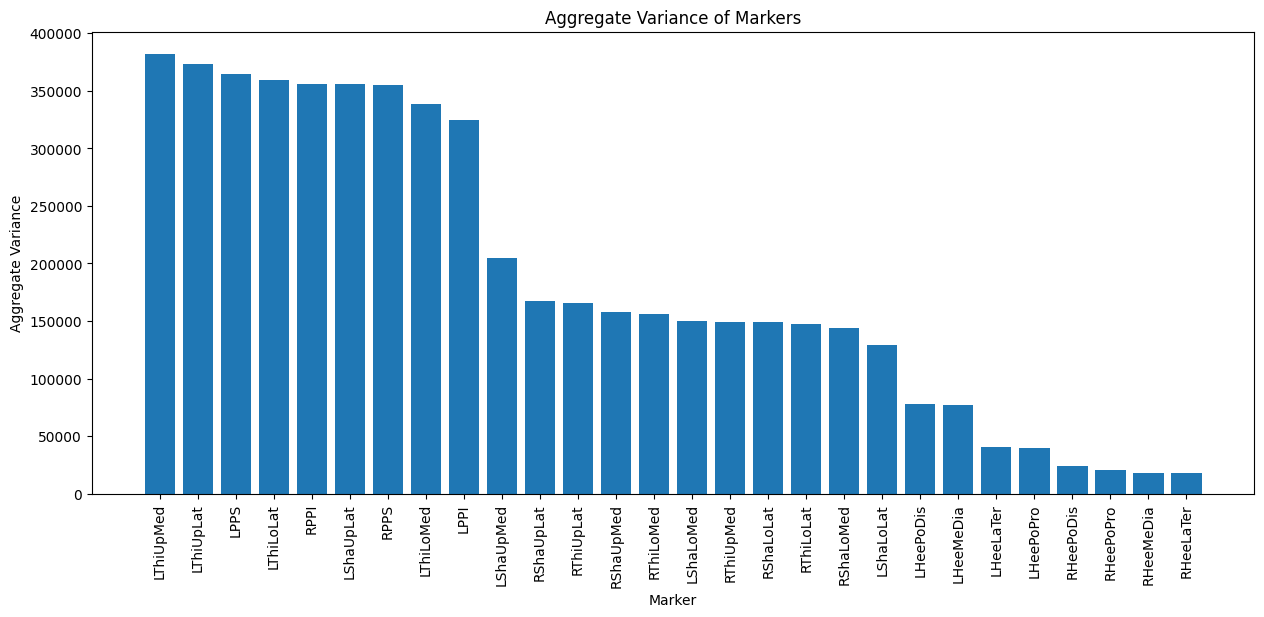

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv")

# List of unique marker names (excluding the axis part)
markers = set(col.split('_')[0] for col in df.columns if 'Axis' in col)

# Calculate aggregate variance for each marker
aggregate_variance = {marker: df[[f'{marker}_AxisX', f'{marker}_AxisY', f'{marker}_AxisZ']].var().sum()
                      for marker in markers}

# Sort markers by aggregate variance
sorted_markers = sorted(aggregate_variance, key=aggregate_variance.get, reverse=True)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(sorted_markers, [aggregate_variance[marker] for marker in sorted_markers])
plt.xlabel('Marker')
plt.ylabel('Aggregate Variance')
plt.title('Aggregate Variance of Markers')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


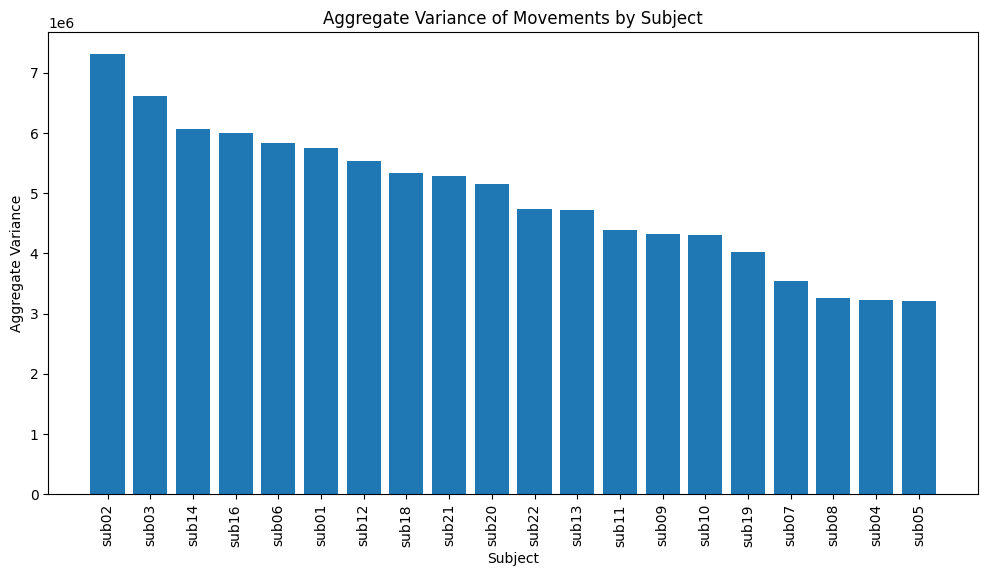

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace with the correct path to your CSV file
df = pd.read_csv("C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv")

# Exclude non-marker columns (like Timestamp, Exercise, Subject)
marker_columns = [col for col in df.columns if 'Axis' in col]

# Calculate aggregate variance for each subject
aggregate_variance_by_subject = df.groupby('Subject')[marker_columns].var().sum(axis=1)

# Sort subjects by aggregate variance
sorted_subjects = aggregate_variance_by_subject.sort_values(ascending=False).index

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_subjects, aggregate_variance_by_subject[sorted_subjects])
plt.xlabel('Subject')
plt.ylabel('Aggregate Variance')
plt.title('Aggregate Variance of Movements by Subject')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


Plotting the mean for the markers for the Squat exercise

C:\Users\nevio\AppData\Local\Temp\ipykernel_19916\3589281450.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_squat_by_subject = squat_df.groupby('Subject').mean()


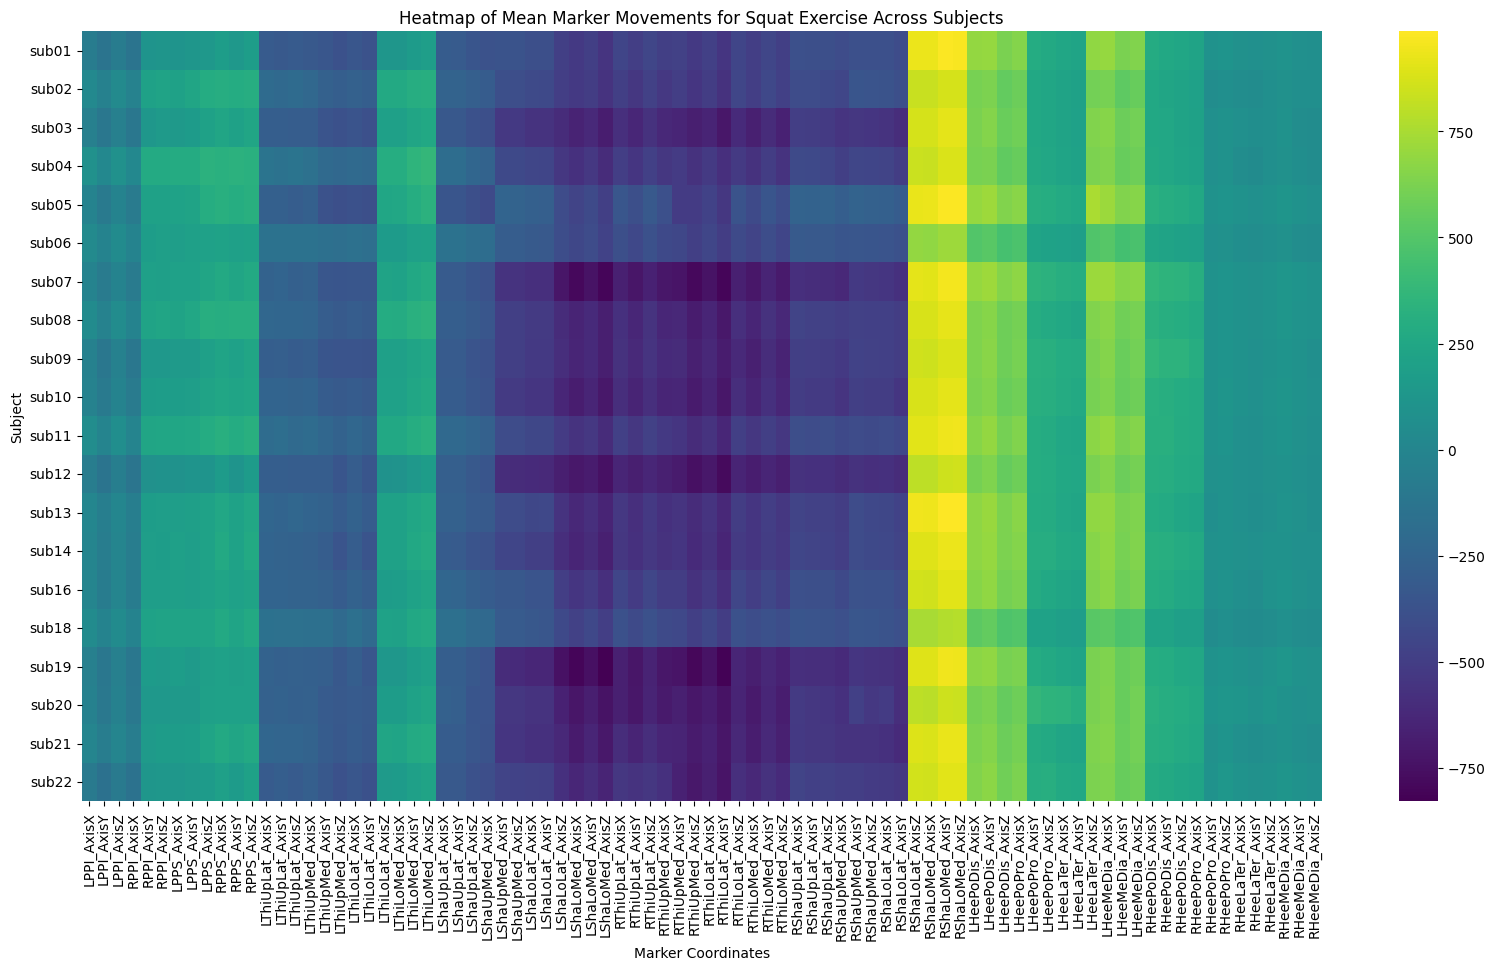

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv")

# Filter for the "Squat" exercise
squat_df = df[df['Exercise'] == 'Squat']

# Group by Subject and calculate the mean
mean_squat_by_subject = squat_df.groupby('Subject').mean()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(mean_squat_by_subject, cmap='viridis')
plt.title('Heatmap of Mean Marker Movements for Squat Exercise Across Subjects')
plt.xlabel('Marker Coordinates')
plt.ylabel('Subject')
plt.show()


Same Heatmap but only for the 4 markers placed on the subjects' pelvis

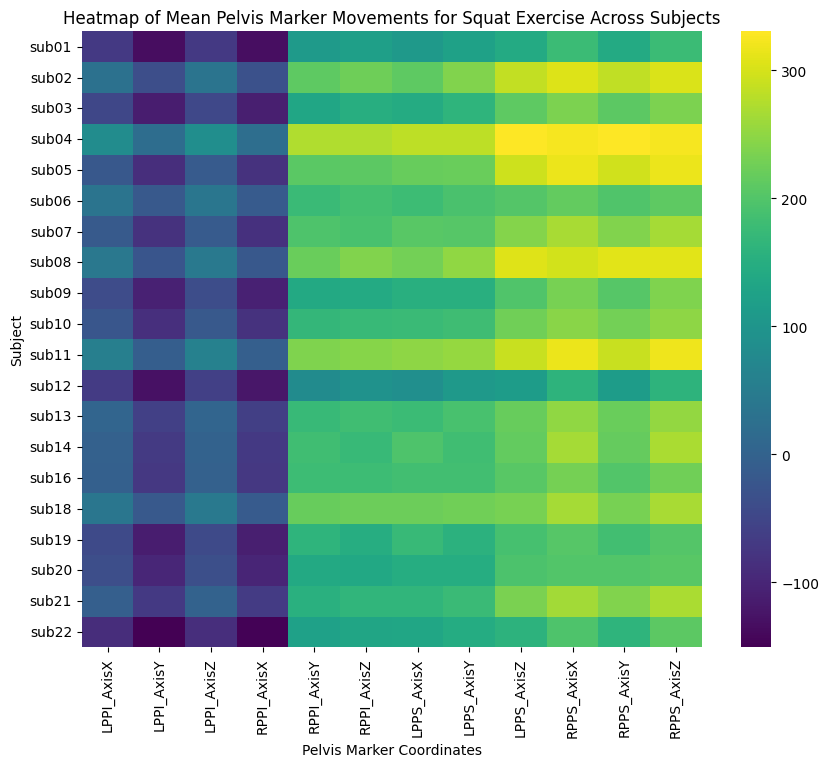

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv")

# Filter for the "Squat" exercise
squat_df = df[df['Exercise'] == 'Squat']

# Define the pelvis markers
pelvis_markers = ['LPPI', 'RPPI', 'LPPS', 'RPPS']

# Select only the columns for the pelvis markers and their respective axes
pelvis_columns = [col for col in df.columns if any(marker in col for marker in pelvis_markers)]

# Group the data by Subject and calculate the mean for the pelvis markers
mean_squat_by_subject_pelvis = squat_df.groupby('Subject')[pelvis_columns].mean()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_squat_by_subject_pelvis, cmap='viridis')
plt.title('Heatmap of Mean Pelvis Marker Movements for Squat Exercise Across Subjects')
plt.xlabel('Pelvis Marker Coordinates')
plt.ylabel('Subject')
plt.show()


Plotting the variability of all exercises for the 5 subjects who showed the highest variance

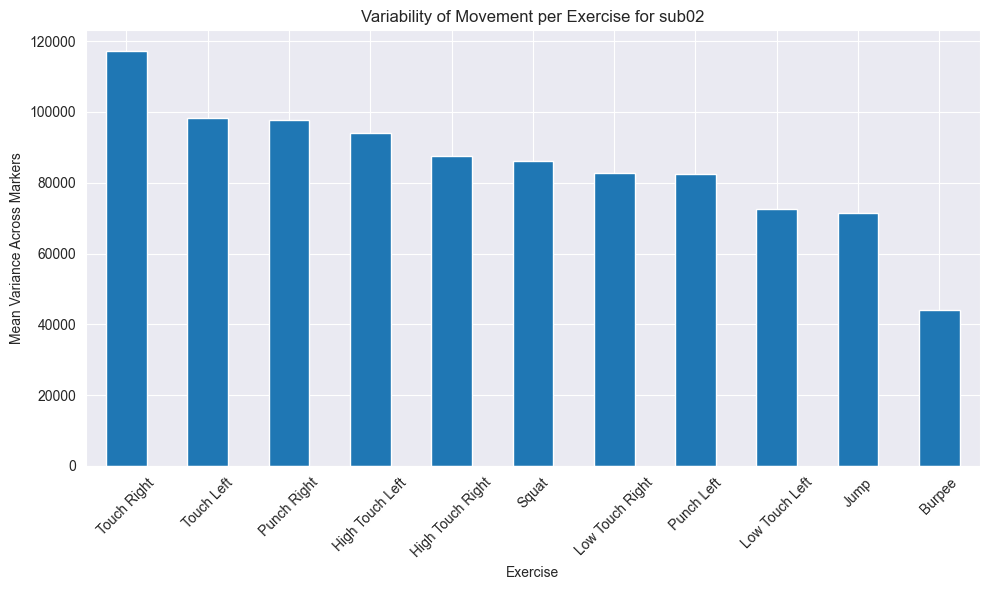

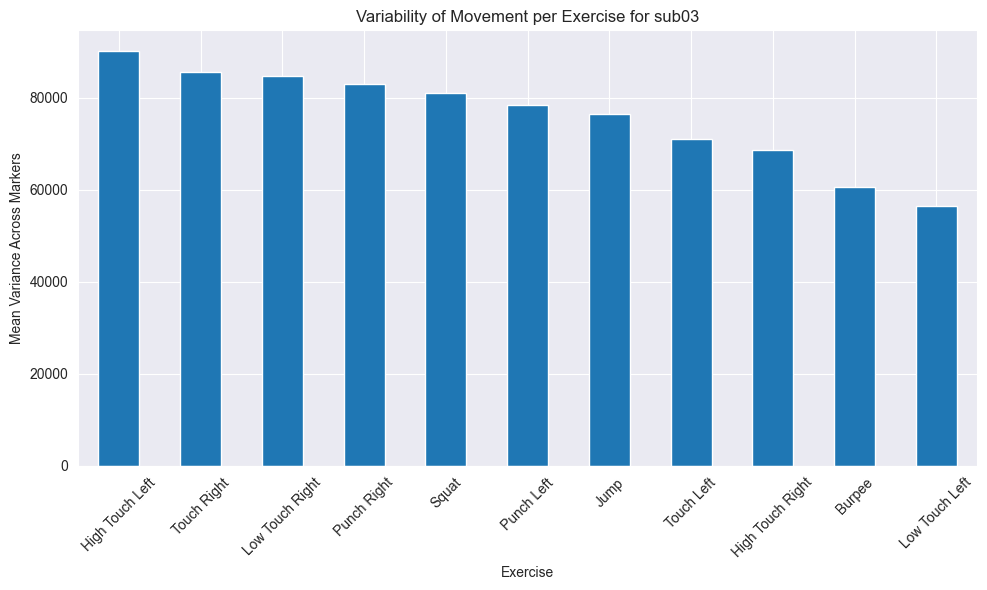

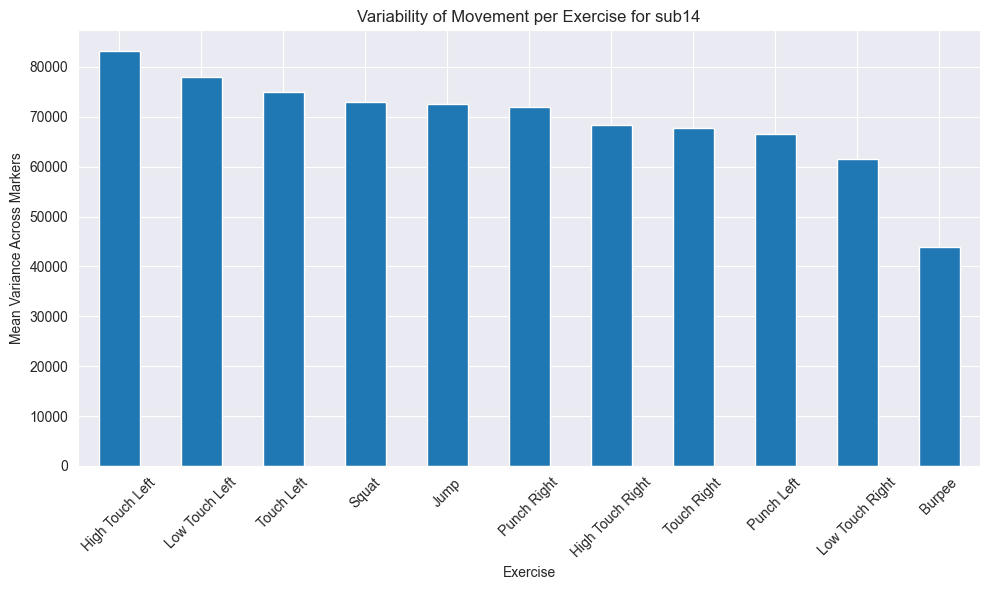

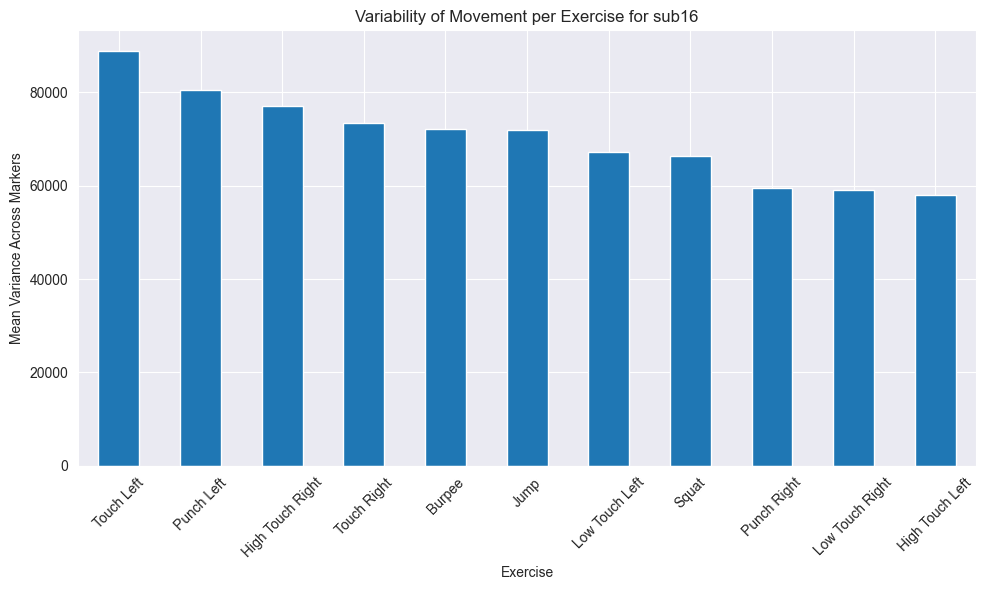

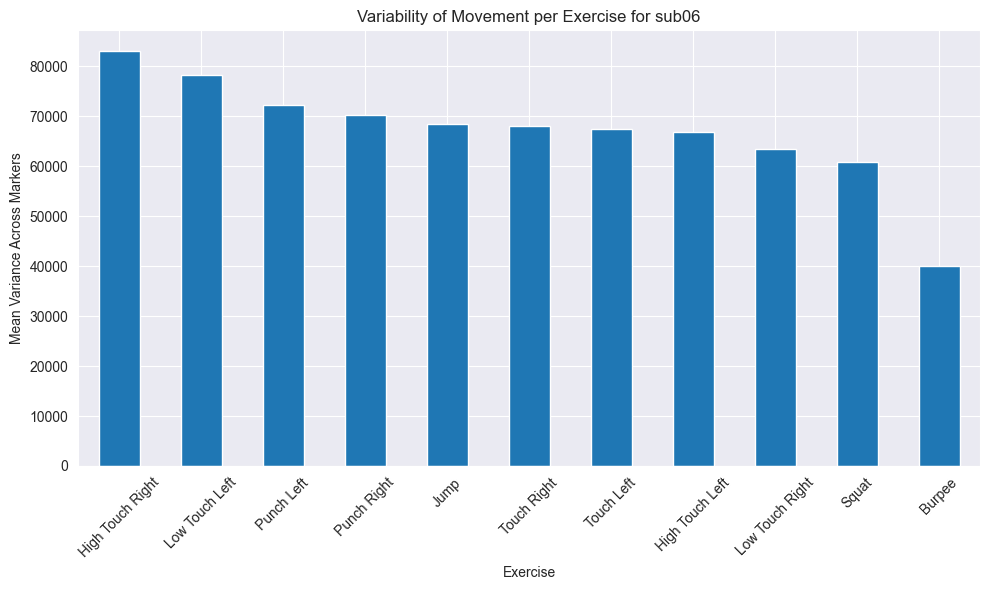

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define the subjects for which you want to generate plots
subjects = ['sub02', 'sub03', 'sub14', 'sub16', 'sub06']

# Define marker columns (assuming the same structure as before)
marker_columns = [col for col in df.columns if 'Axis' in col]

# Generate a bar plot for each subject
for subject in subjects:
    # Filter the DataFrame for the current subject
    subject_df = df[df['Subject'] == subject]

    # Calculate the variance for each exercise for the current subject
    exercise_variance = subject_df.groupby('Exercise')[marker_columns].var().mean(axis=1)
    sorted_exercises = exercise_variance.sort_values(ascending=False)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sorted_exercises.plot(kind='bar')
    plt.title(f'Variability of Movement per Exercise for {subject}')
    plt.ylabel('Mean Variance Across Markers')
    plt.xlabel('Exercise')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Plotting the aggregate Variance of all movements across als subjects to see which exercise shows the highest Variability

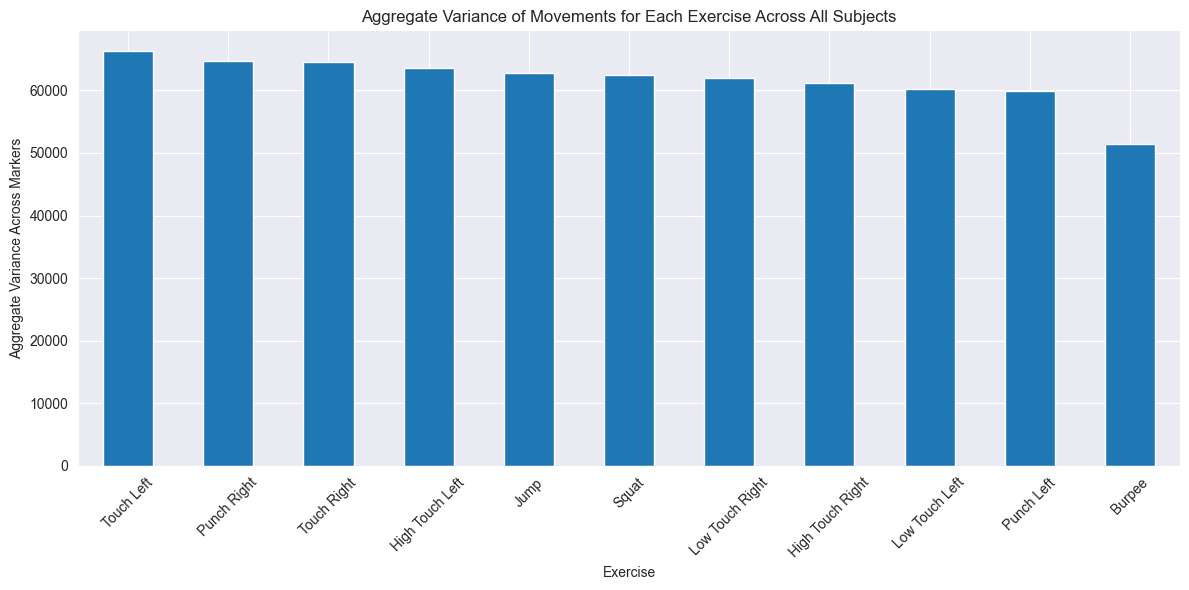

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define marker columns (assuming the same structure as before)
marker_columns = [col for col in df.columns if 'Axis' in col]

# Calculate the aggregate variance for each exercise across all subjects
aggregate_variance = df.groupby('Exercise')[marker_columns].var().mean(axis=1)

# Sort the exercises by aggregate variance
sorted_exercises = aggregate_variance.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sorted_exercises.plot(kind='bar')
plt.title('Aggregate Variance of Movements for Each Exercise Across All Subjects')
plt.ylabel('Aggregate Variance Across Markers')
plt.xlabel('Exercise')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("aggregate_variance_exercises.png")  # Save the figure
plt.show()


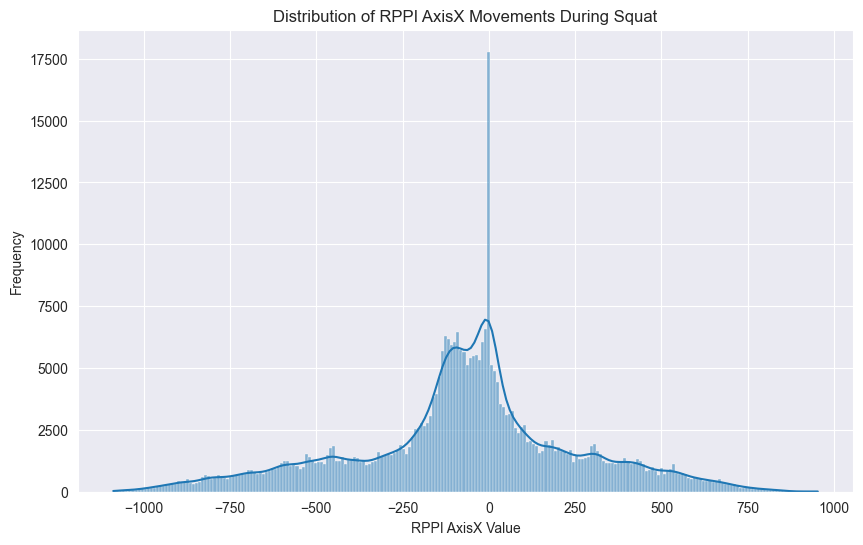

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define the marker, axis, and exercise of interest
marker = 'LPPI'  # Example marker
axis = 'AxisX'   # Example axis (X, Y, or Z)
exercise = 'Squat'  # Example exercise

# Filter the DataFrame for the specific exercise and marker axis
filtered_data = df[df['Exercise'] == exercise][f'{marker}_{axis}']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, kde=True)
plt.title(f'Distribution of {marker} {axis} Movements During {exercise}')
plt.xlabel(f'{marker} {axis} Value')
plt.ylabel('Frequency')
plt.show()


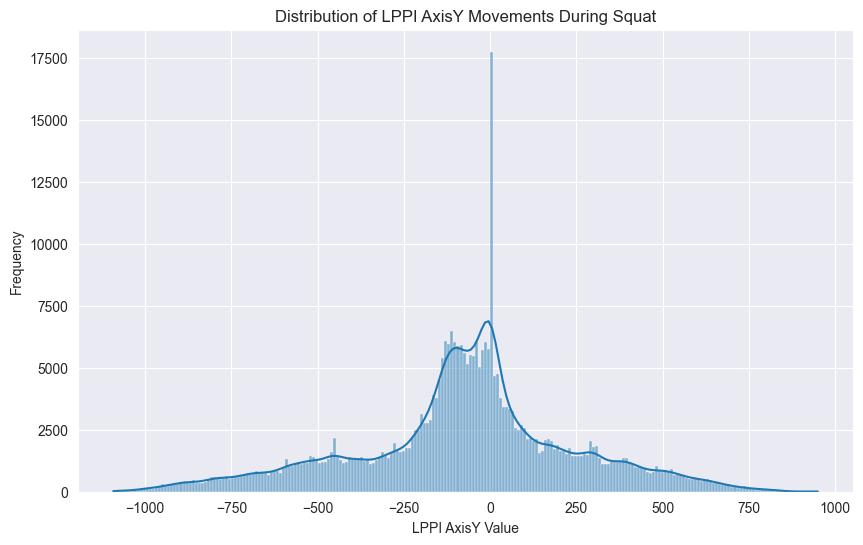

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define the marker, axis, and exercise of interest
marker = 'LPPI'  # Example marker
axis = 'AxisY'   # Example axis (X, Y, or Z)
exercise = 'Squat'  # Example exercise

# Filter the DataFrame for the specific exercise and marker axis
filtered_data = df[df['Exercise'] == exercise][f'{marker}_{axis}']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, kde=True)
plt.title(f'Distribution of {marker} {axis} Movements During {exercise}')
plt.xlabel(f'{marker} {axis} Value')
plt.ylabel('Frequency')
plt.show()


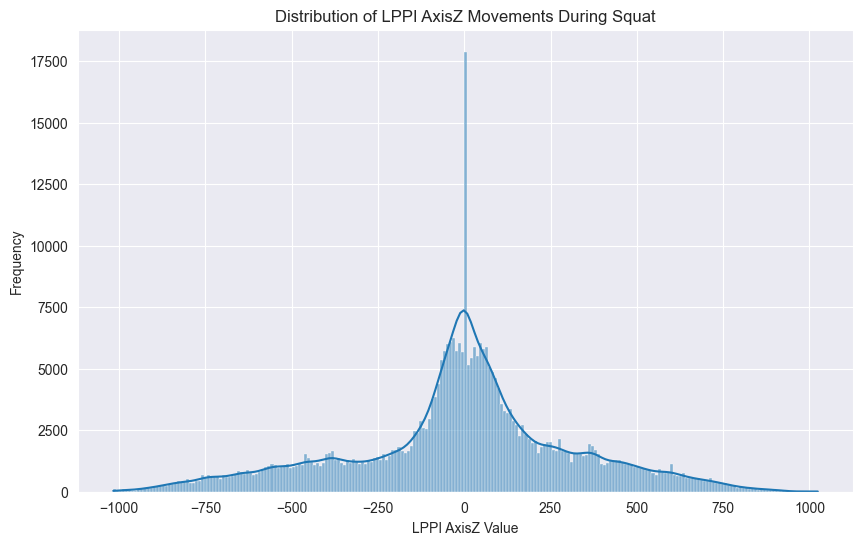

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"

# Load the dataset
df = pd.read_csv(csv_file_path)

# Define the marker, axis, and exercise of interest
marker = 'LPPI'  # Example marker
axis = 'AxisZ'   # Example axis (X, Y, or Z)
exercise = 'Squat'  # Example exercise

# Filter the DataFrame for the specific exercise and marker axis
filtered_data = df[df['Exercise'] == exercise][f'{marker}_{axis}']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, kde=True)
plt.title(f'Distribution of {marker} {axis} Movements During {exercise}')
plt.xlabel(f'{marker} {axis} Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv")

# Define the marker, axis, and exercise of interest
marker = 'LPPI'  # Example marker
axis = 'AxisX'   # Example axis (X, Y, or Z)
exercise = 'Squat'  # Example exercise

# List of subjects
subjects = df['Subject'].unique()

# Create a separate plot for each subject
for subject in subjects:
    # Filter the DataFrame for the specific subject, exercise, and marker axis
    subject_data = df[(df['Subject'] == subject) & (df['Exercise'] == exercise)][f'{marker}_{axis}']

    # Create a histogram for the subject
    plt.figure(figsize=(10, 6))
    sns.histplot(subject_data, kde=True)
    plt.title(f'Distribution of {marker} {axis} Movements During {exercise} - {subject}')
    plt.xlabel(f'{marker} {axis} Value')
    plt.ylabel('Frequency')
    plt.show()


In [9]:
import pandas as pd

# Load the dataset
csv_file_path = "C:/Users/nevio/OneDrive - ZHAW/5. Semester/Projektarbeit/combined_data.csv"
df = pd.read_csv(csv_file_path)

# Count the number of occurrences of each exercise
exercise_counts = df['Exercise'].value_counts()

# Print the exercise counts
print(exercise_counts)


Punch Right         379200
Jump                376560
Punch Left          358320
Squat               340080
High Touch Left     235920
High Touch Right    215520
Low Touch Left      206640
Low Touch Right     202560
Touch Left          201360
Touch Right         193920
Burpee               81600
Name: Exercise, dtype: int64
